In [2]:
import numpy as np
result = np.load('../bayes_implicit_solvent/continuous_parameter_experiments/freesolv_mh_jax_lotso_iterations.npz')
result2 = np.load('../bayes_implicit_solvent/continuous_parameter_experiments/freesolv_mh_jax_lotso_iterations_different_start.npz')



In [3]:
list(result.keys())

['traj', 'log_prob_traj', 'expt_means', 'expt_uncs', 'cids', 'elements']

In [4]:
traj = result['traj']
log_prob_traj = result['log_prob_traj']
expt_means = result['expt_means']
expt_uncs = result['expt_uncs']
cids = result['cids']
elements = result['elements']

In [86]:
len(traj)

100001

In [87]:
len(expt_means)

315

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

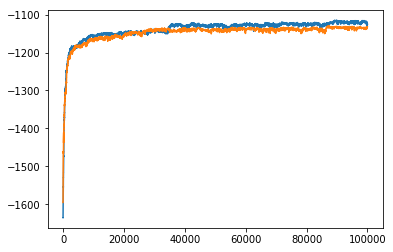

In [91]:
plt.plot(log_prob_traj)
log_prob_traj2 = result2['log_prob_traj']
plt.plot(log_prob_traj2)

(-1160.3132359824315, -1088.7187729937527)

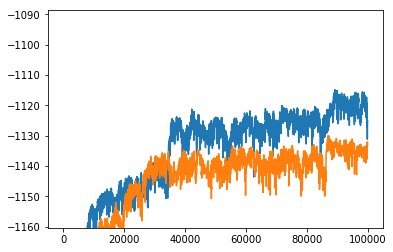

In [92]:
plt.plot(log_prob_traj)
plt.plot(log_prob_traj2)
#plt.xlim(10000)
plt.ylim(log_prob_traj[10000],)

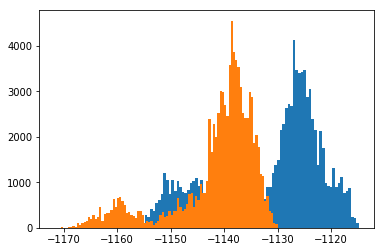

In [93]:
plt.hist(log_prob_traj[10000:], bins=100);
plt.hist(log_prob_traj2[10000:], bins=100);

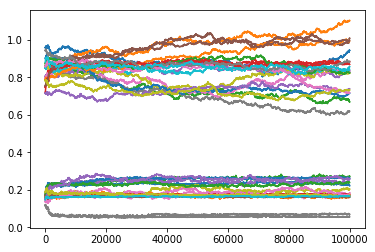

In [94]:
plt.plot(traj)
traj2 = result2['traj']
plt.plot(traj2)

(array([5.4000e+01, 1.1400e+02, 4.1000e+01, 4.3000e+01, 2.0000e+02,
        2.2010e+03, 1.5161e+04, 4.1349e+04, 3.7168e+04, 3.6700e+03]),
 array([0.18      , 0.18683623, 0.19367247, 0.2005087 , 0.20734494,
        0.21418117, 0.22101741, 0.22785364, 0.23468988, 0.24152611,
        0.24836235]),
 <a list of 10 Patch objects>)

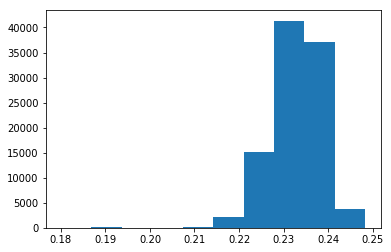

In [11]:
plt.hist(traj[:,0])

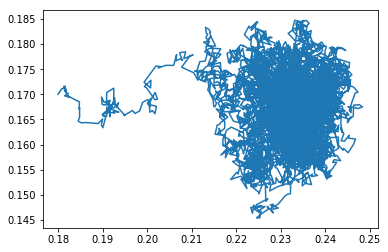

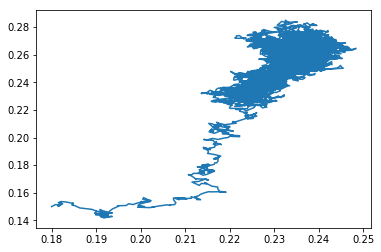

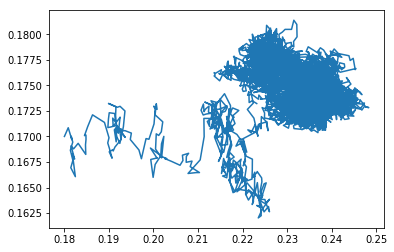

In [12]:
plt.plot(traj[:,0], traj[:,1])
plt.figure()
plt.plot(traj[:,0], traj[:,2])
plt.figure()
plt.plot(traj[:,0], traj[:,3])

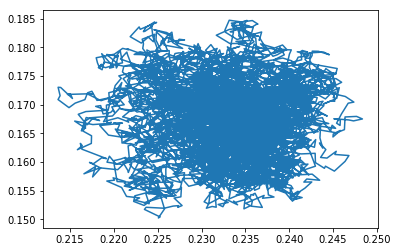

In [13]:
plt.plot(traj[2000:,0], traj[2000:,1])

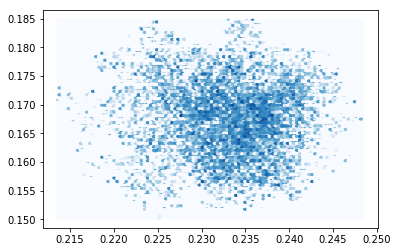

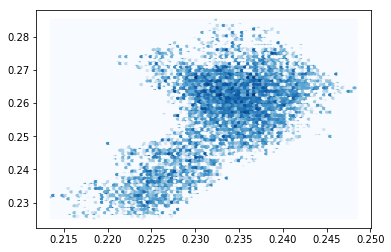

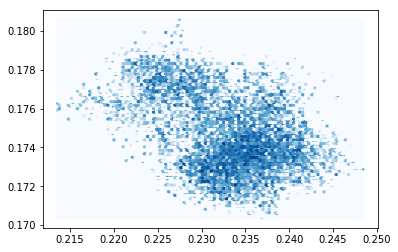

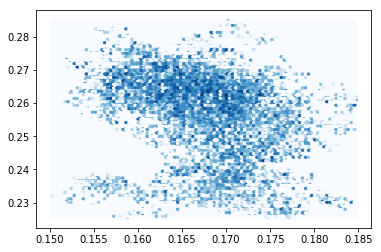

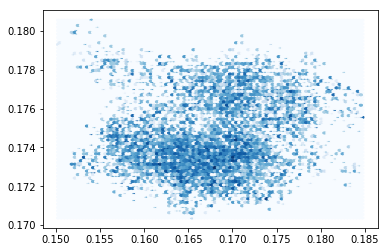

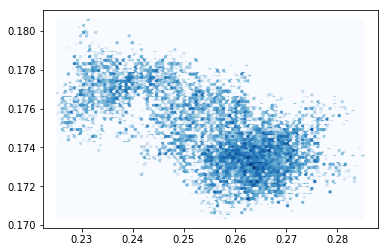

In [14]:
plt.hexbin(traj[2000:,0], traj[2000:,1], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,2], traj[2000:,3], cmap='Blues', bins='log');

In [15]:
from bayes_implicit_solvent.continuous_parameter_experiments.elemental_types_mh_jax import get_predictions

number of molecules being considered: 321
first few CIDs ['mobley_3187514', 'mobley_900088', 'mobley_766666', 'mobley_5056289', 'mobley_4630641']


/Users/joshuafass/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:167: UserWarning: No GPU found, falling back to CPU.
  warnings.warn('No GPU found, falling back to CPU.')


discarding c1c(=O)[nH]c(=O)[nH]c1Cl (mobley_4338603) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)Cl (mobley_9557440) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl (mobley_2523689) because its free energy was outside of the range [-15, +5] kcal/mol
discarding C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O (mobley_9534740) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)F (mobley_337666) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)I (mobley_2727678) because its free energy was outside of the range [-15, +5] kcal/mol


  0%|          | 0/315 [00:00<?, ?it/s]

jit-compiling things...


100%|██████████| 315/315 [03:38<00:00,  1.50it/s]


In [61]:
from tqdm import tqdm
prediction_traj = np.array([get_predictions(theta) for theta in traj[::50]])

In [95]:
prediction_traj2 = np.array([get_predictions(theta) for theta in traj2[::50]])

In [69]:
prediction_traj.shape

(2001, 315)

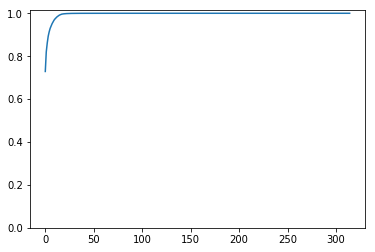

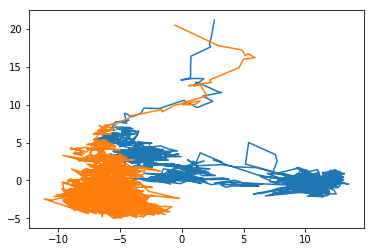

In [115]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(np.vstack((prediction_traj, prediction_traj2)))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0,)

plt.figure()

y = pca.transform(prediction_traj)
plt.plot(y[:,0], y[:,1])

y2 = pca.transform(prediction_traj2)
plt.plot(y2[:,0], y2[:,1])

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
X = np.vstack((prediction_traj, prediction_traj2))
y = np.hstack((np.zeros(len(prediction_traj)), np.ones(len(prediction_traj2))))
lda.fit(X, y)

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [117]:
y.shape

(4002,)

(array([2001.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2001.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

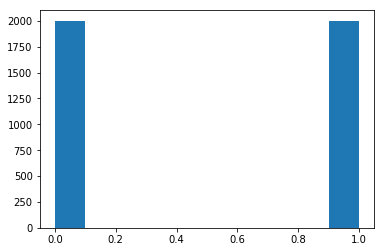

In [118]:
X_ = lda.predict(X)
X_.shape
plt.hist(X_)

In [119]:
X.shape

(4002, 315)

In [120]:
lda.explained_variance_ratio_

array([1.])

In [121]:
X_.shape

(4002,)

In [1]:
np.min(radii)

NameError: name 'np' is not defined

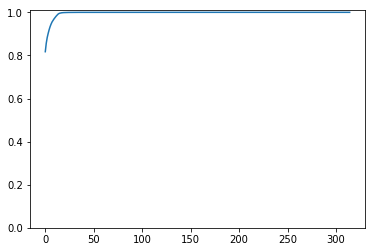

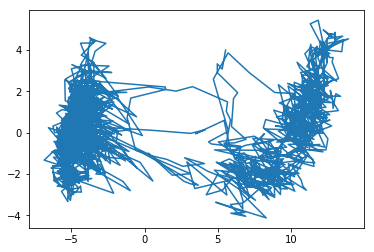

In [122]:
# huh: idea: automatic equilibration detection, but using tICA instead of a pre-specified coordinate
pca = PCA()
pca.fit(prediction_traj[100:])

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0,)

plt.figure()

y = pca.transform(prediction_traj)
plt.plot(y[:,0], y[:,1])

In [123]:
expt_means.shape

(315,)

In [124]:
from simtk import unit
from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)
prediction_traj = unreduce(prediction_traj)
expt_means = unreduce(expt_means)
expt_uncs = unreduce(expt_uncs)

In [114]:
prediction_traj2 = unreduce(prediction_traj2)

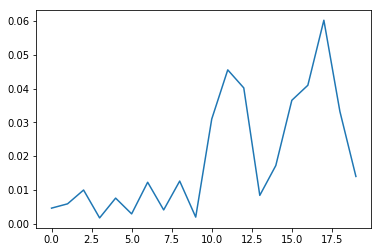

In [65]:
plt.plot(np.std(traj[10000:], 0))

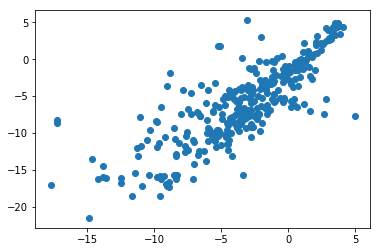

In [126]:
plt.scatter(prediction_traj[0], expt_means)

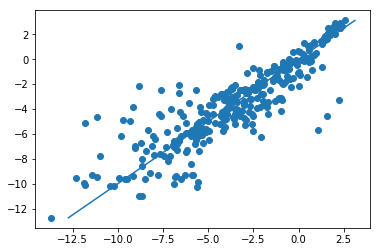

In [135]:
plt.scatter(prediction_traj[-1], expt_means)
diag = np.linspace(min(expt_means), max(expt_means))
plt.plot(diag, diag)

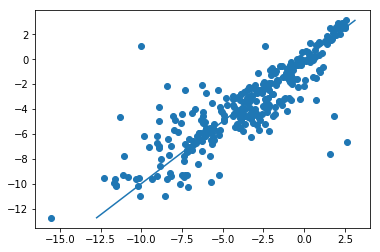

In [136]:
plt.scatter(prediction_traj2[-1], expt_means)
diag = np.linspace(min(expt_means), max(expt_means))
plt.plot(diag, diag)

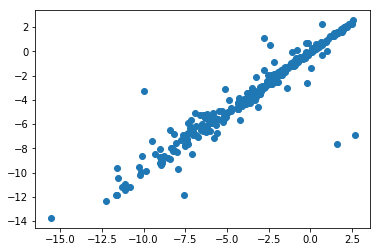

In [128]:
plt.scatter(prediction_traj2[-1], prediction_traj[-1])

In [129]:
def rmse(x, y):
    squared_errors = (x - y)**2
    mean_squared_errors = np.mean(squared_errors)
    root_mean_squared_errors = np.sqrt(mean_squared_errors)
    return root_mean_squared_errors

In [138]:
rmses = np.array([rmse(snapshot, expt_means) for snapshot in prediction_traj])
rmses2 = np.array([rmse(snapshot, expt_means) for snapshot in prediction_traj2])

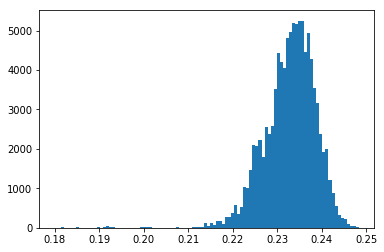

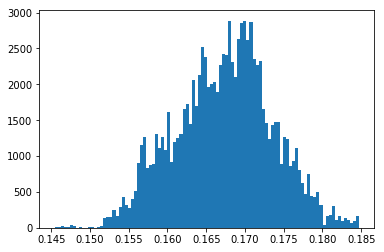

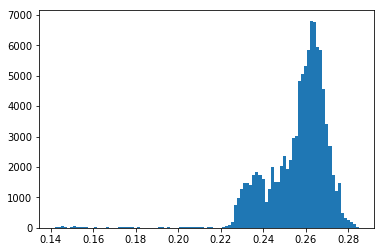

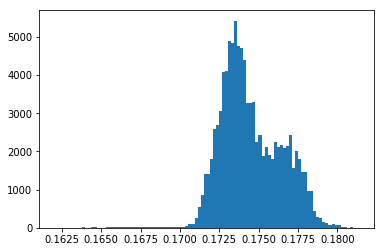

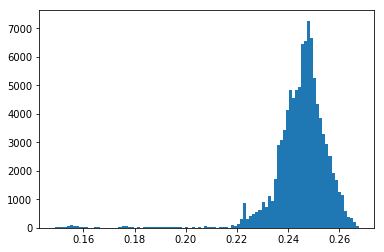

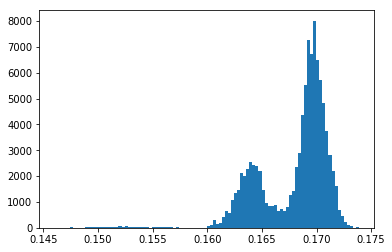

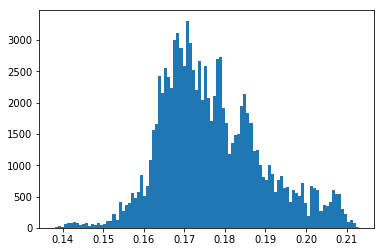

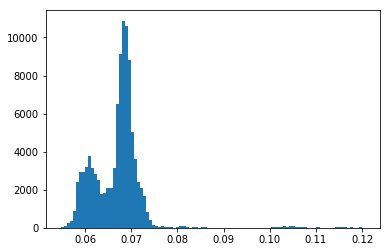

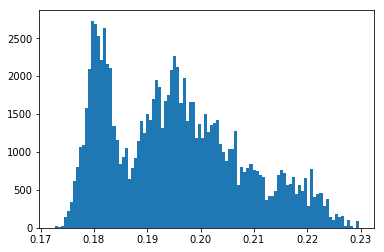

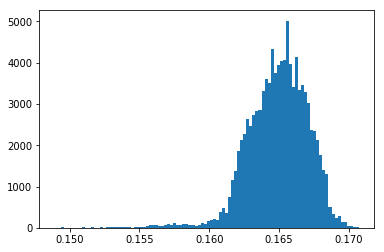

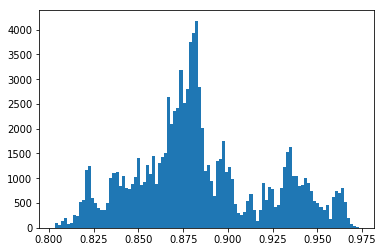

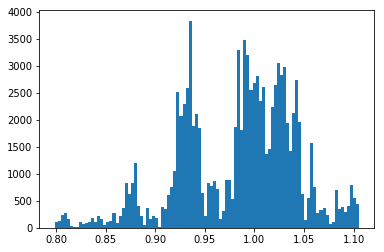

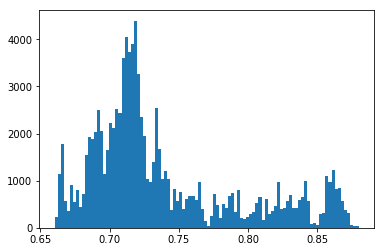

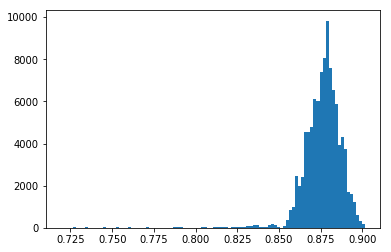

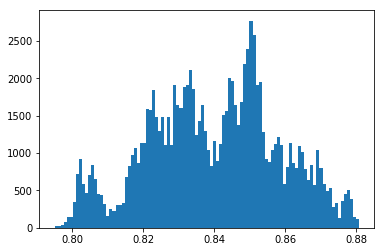

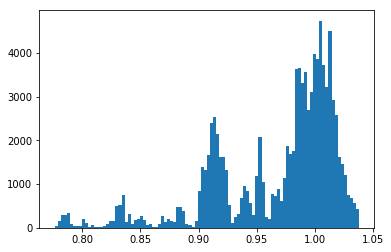

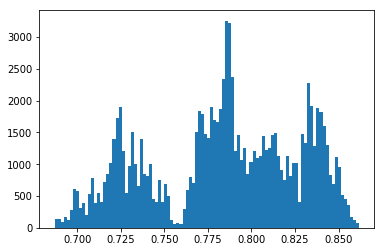

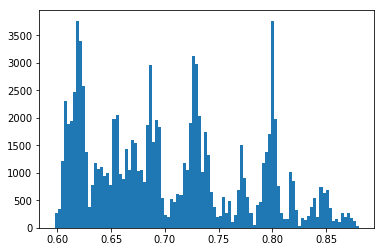

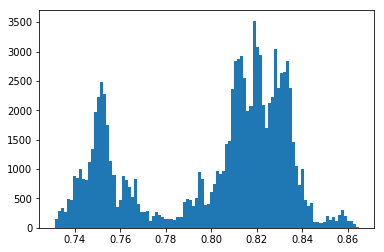

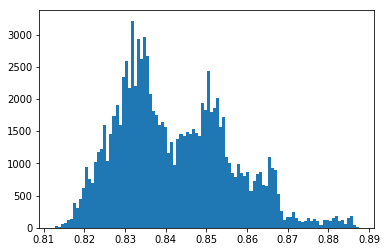

In [43]:
for i in range(len(traj[0])):
    plt.figure()
    plt.hist(np.array(traj)[:,i], bins=100);

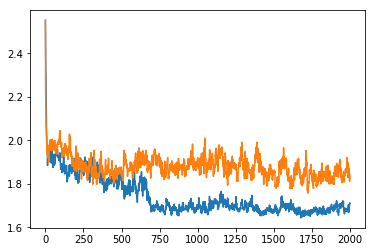

In [139]:
plt.plot(rmses)
plt.plot(rmses2)

(0, 100)

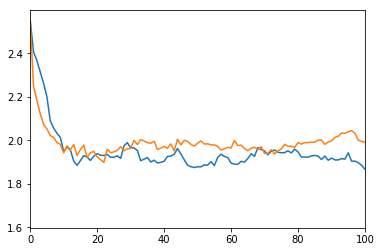

In [171]:
plt.plot(rmses)
plt.plot(rmses2)
plt.xlim(0,100)

In [140]:
prediction_traj[np.argmax(rmses)]

array([-5.9982133e+00,  1.9310968e+00,  1.0016363e+00, -2.9648015e-01,
       -2.3143113e+00, -7.5336986e+00, -5.8839087e+00, -1.3845186e+01,
       -6.6499839e+00,  1.2238680e+00,  3.0629361e+00, -3.6348755e+00,
       -1.1313045e+00,  2.9782629e+00,  1.3176378e+00, -1.7281235e+01,
       -3.5957382e+00, -1.0298961e+01, -2.5550578e+00, -4.5201154e+00,
       -8.6648238e-01, -2.4200664e+00, -9.0721483e+00, -1.7253660e+01,
       -3.9494319e+00, -4.7407541e+00, -9.7545891e+00,  2.0425181e+00,
        3.6175923e+00, -2.5350463e+00, -4.8774284e-01, -5.5843792e+00,
       -6.0442367e+00, -2.9107380e+00, -5.6646901e-01, -5.5159974e+00,
       -9.5418863e+00, -1.9829980e+00, -7.8275695e+00,  3.8387451e+00,
       -2.8017542e+00, -3.0137954e+00, -2.6316915e+00,  7.4966592e-01,
       -5.8621997e-01,  2.1465292e+00, -3.1365463e-01, -9.4750977e+00,
       -1.1297860e+01, -2.3351345e+00, -3.7719163e-01,  1.2227678e+00,
        1.6338766e+00,  2.5809026e+00, -1.1422023e+01,  3.7702601e+00,
      

In [141]:
prediction_traj[np.argmin(rmses)]

array([-5.3987226e+00,  1.9698170e-01, -1.4990905e-01, -8.7133265e-01,
       -3.1498284e+00, -5.5172663e+00, -5.1628261e+00, -1.0769175e+01,
       -5.4841056e+00, -3.6234581e-01,  1.6068673e+00, -3.3582263e+00,
       -1.9048488e+00,  1.8871726e+00,  1.6078448e-02, -8.8902864e+00,
       -3.4759622e+00, -7.8003054e+00, -3.3214869e+00, -3.1077449e+00,
        2.2448027e-01, -5.4700828e-01, -1.0691485e+01, -1.0041906e+01,
       -3.7708716e+00, -4.2763724e+00, -7.0564690e+00,  6.9245028e-01,
        2.1123245e+00, -3.7867355e+00,  5.3391093e-01, -4.9683118e+00,
       -5.4629140e+00, -3.5537562e+00, -1.2756374e+00, -5.7755399e+00,
       -8.8511572e+00, -2.5291176e+00, -7.1202760e+00,  2.0992963e+00,
       -3.5997977e+00, -3.4692981e+00, -5.1873550e+00, -3.2038069e-01,
       -8.0574608e-01,  1.4833639e+00,  5.0647128e-01, -7.0943618e+00,
       -8.9665442e+00, -3.4936588e+00, -3.5566125e+00,  1.5702274e-01,
       -7.3101157e-01,  1.3784184e+00, -8.1314564e+00,  2.5234852e+00,
      

In [142]:
expt_means

array([ -5.53,   0.4 ,  -0.44,  -3.3 ,  -4.84,  -5.88,  -5.57,  -9.44,
        -7.37,  -0.23,   1.58,  -2.36,  -1.91,   2.38,  -0.1 ,  -4.87,
        -4.33,  -5.71,  -3.35,  -5.29,   0.08,  -1.12, -10.17,  -5.1 ,
        -3.24,  -3.68,  -9.45,   1.16,   2.56,  -4.57,   0.27,  -4.22,
        -5.9 ,  -4.12,  -1.38,  -5.94,  -9.37,  -3.15,  -2.49,   2.06,
        -5.46,  -4.59,  -5.48,  -2.13,  -3.09,   1.83,  -0.99,  -9.63,
        -7.1 ,  -4.42,  -3.44,  -0.1 ,  -1.34,   1.23,  -9.13,   2.67,
        -7.  ,  -6.79,  -6.68,  -2.48,  -4.53,   1.38,  -3.2 ,  -2.56,
         2.51,  -5.91,  -2.11,  -6.23,  -3.81,  -6.5 ,   1.79,   1.07,
        -4.39,  -4.59,  -7.77,   0.  ,   1.28,  -0.99,  -4.29,  -3.95,
        -5.04,  -0.82,  -2.51,  -3.65,   2.52,  -2.33,  -9.28, -10.  ,
        -8.41, -10.08,  -0.98,  -6.96,  -3.12,  -2.81,  -0.22,  -4.4 ,
        -9.94,  -6.25,  -1.14,  -3.11,  -5.51,  -3.88,  -3.15,  -0.86,
        -2.04, -10.21,  -1.64,   0.14,  -2.69,  -6.92,  -7.07,  -9.84,
      

In [143]:
traj[np.argmax(rmses)]

array([0.18 , 0.17 , 0.15 , 0.17 , 0.15 , 0.155, 0.15 , 0.12 , 0.185,
       0.15 , 0.96 , 0.8  , 0.88 , 0.72 , 0.8  , 0.79 , 0.8  , 0.85 ,
       0.86 , 0.85 ])

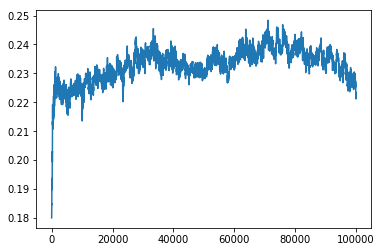

In [144]:
plt.plot(traj[:,0])

(0, 4)

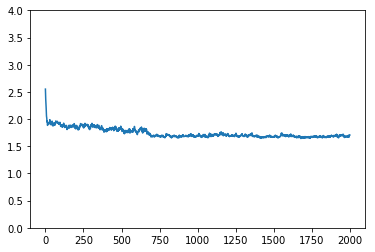

In [145]:
plt.plot(rmses)
plt.ylim(0,4)

In [180]:
rmses[20], rmses[40], rmses[1000]

(1.937877982687534, 1.9031141680671169, 1.6982485409712977)

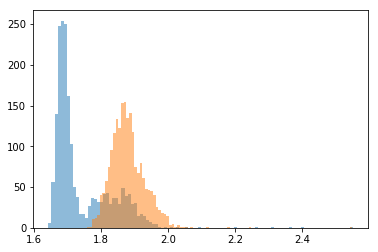

In [150]:
plt.hist(rmses, bins=100, alpha=0.5);
plt.hist(rmses2, bins=100, alpha=0.5);

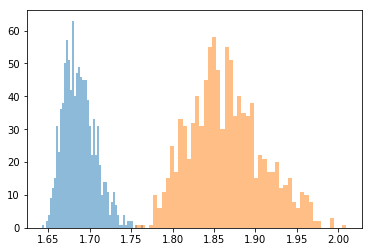

In [182]:
plt.hist(rmses[1000:], bins=50, alpha=0.5);
plt.hist(rmses2[1000:], bins=50, alpha=0.5);

In [147]:
np.mean(rmses > 4)

0.0

In [148]:
min(rmses)

1.6426239488505476

In [189]:
min(np.min(traj, 0)[:N]), max(np.max(traj, 0)[:N])

(0.05472536717816803, 0.2849221354378569)

In [190]:
min(np.min(traj, 0)[N:]), max(np.max(traj, 0)[N:])

(0.5975507454927127, 1.1055326796821554)

In [54]:
x = np.linspace(np.min(prediction_traj), np.max(prediction_traj))

from scipy.stats import t as student_t
ys = [student_t.pdf(x, loc=expt_means[i], scale=expt_uncs[i], df=7) for i in range(len(expt_means))]

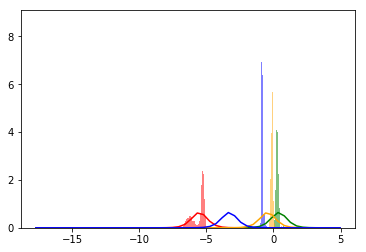

In [55]:
colors = ['red', 'green', 'orange', 'blue']

for i in range(len(colors)):
    plt.hist(prediction_traj[:,i], bins=50, density=True, color=colors[i], alpha=0.5);
    plt.plot(x, ys[i], c=colors[i])

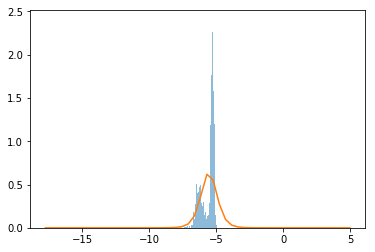

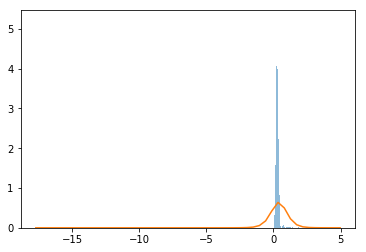

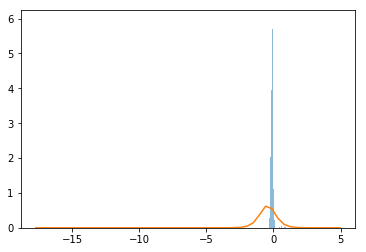

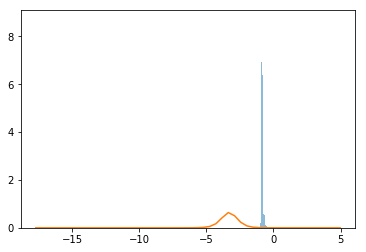

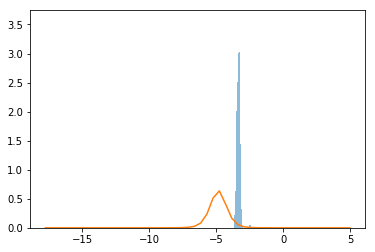

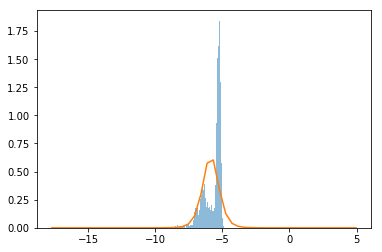

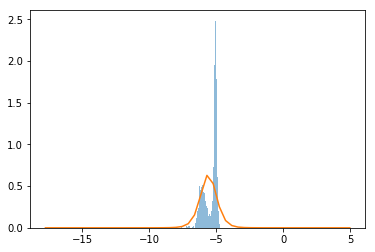

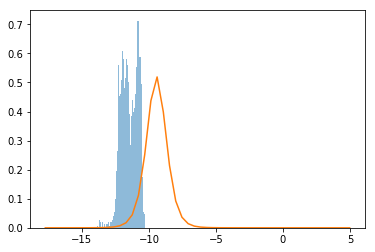

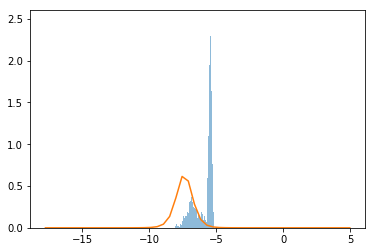

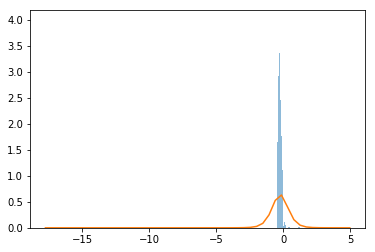

In [58]:
for i in range(len(expt_means))[:10]:
    plt.figure()
    plt.hist(prediction_traj[:,i], bins=50, density=True, alpha=0.5);
    plt.plot(x, ys[i])

In [156]:
diffs = np.diff(traj[100:], axis=0)

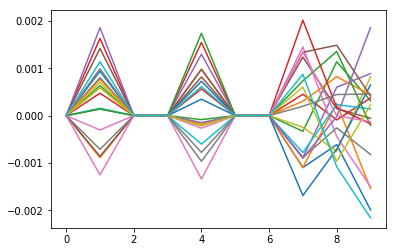

In [157]:
plt.plot(diffs[:10])

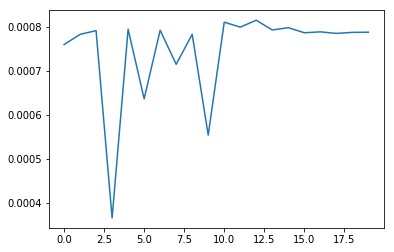

In [161]:
plt.plot(np.mean(np.abs(diffs)[np.linalg.norm(diffs, axis=1) > 0], 0))

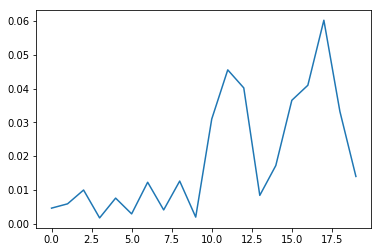

In [164]:
plt.plot(np.std(traj[10000:], axis=0))

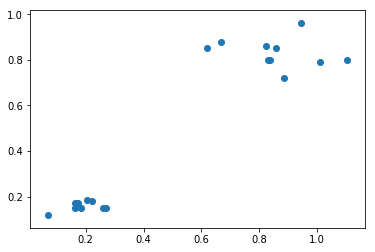

In [167]:
plt.scatter(traj[-1], traj[0])

In [174]:
N = int(len(traj[-1]) / 2)
sorted(traj[-1][:N])

[0.06937660327619226,
 0.16179862838961226,
 0.1639401334084961,
 0.16960442805258813,
 0.17322085315475744,
 0.18393660760930575,
 0.20456417295614507,
 0.223195265090364,
 0.2595491719364561,
 0.27135674484247496]

In [176]:
N = int(len(traj2[-1]) / 2)
sorted(traj2[-1][:N])

[0.05658696237739203,
 0.16087986778990643,
 0.1666026114275104,
 0.16667118992421895,
 0.17112001491895676,
 0.17697481961871042,
 0.18508107172622829,
 0.23970604642761278,
 0.2583697378592109,
 0.26294600394466244]

In [177]:
np.argmin(traj[-1][:N])

7

In [169]:
log_prob_traj[-1]

-1125.144883687863

In [170]:
log_prob_traj[0]

-1636.0515538175491

In [ ]:
plt.